In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rakshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from nltk.probability import FreqDist

In [4]:
df = pd.read_csv(r'C:\jupyter NB\synthetic_healthcare_reviews_with_text.csv') 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  9000 non-null   object
 1   Rating       10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [6]:
df.head()

,Review_Text,Rating
0,The visit was average. Mixed feelings.,2
1,The service had satisfied. Highly recommended.,2
2,The visit was decent. Neither good nor bad.,4
3,The experience was unremarkable. Nothing excep...,1
4,The environment exceeded excellent. Exceeded m...,2


In [7]:
df.isnull().sum()

Review_Text    1000
Rating            0
dtype: int64

In [8]:
#count of each rating 
print(f"Rating value count: \n{df['Rating'].value_counts()}")

Rating value count: 
Rating
2    2050
5    2030
1    2010
4    1979
3    1931
Name: count, dtype: int64


In [9]:
#Rating vale count - percentage distrubution
print(f"Rating vale count - percentage distrubution: \n{round(df['Rating'].value_counts()/df.shape[0]*100,2)}")

Rating vale count - percentage distrubution: 
Rating
2    20.50
5    20.30
1    20.10
4    19.79
3    19.31
Name: count, dtype: float64


In [10]:
df.describe()

,Rating
count,10000.000000
mean,2.996900
std,1.420948
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [11]:
fdist= FreqDist(df['Review_Text'])

In [12]:
fdist.most_common(10)

[(nan, 1000),
 ('The service met average. Neither good nor bad.', 13),
 ('The experience met mediocre. Nothing exceptional.', 13),
 ('The experience met decent. Just ordinary.', 13),
 ('The experience felt okay. Neither good nor bad.', 12),
 ('The service had okay. Neither good nor bad.', 12),
 ('The service met mediocre. Neither good nor bad.', 12),
 ('The visit was decent. Just ordinary.', 12),
 ('The service felt average. Nothing exceptional.', 11),
 ('The service felt fine. Neither good nor bad.', 11)]

In [13]:
from textblob import TextBlob

In [14]:
df['Review_Text'] = df['Review_Text'].fillna("")

In [15]:
df['Review_Text'].apply(lambda review: TextBlob(review).sentiment.polarity)

0      -0.075000
1       0.330000
2       0.055556
3       0.666667
4       1.000000
          ...   
9995    0.258333
9996    0.580000
9997   -0.300000
9998   -0.500000
9999   -0.166667
Name: Review_Text, Length: 10000, dtype: float64

In [16]:
df['sentiment_polarity'] = df['Review_Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [17]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Create a 'sentiment' column using the classify_sentiment function
df['sentiment'] = df['sentiment_polarity'].apply(classify_sentiment)

# Display the DataFrame with the new 'sentiment' column
print(df)

                                            Review_Text  Rating  \
0                The visit was average. Mixed feelings.       2   
1        The service had satisfied. Highly recommended.       2   
2           The visit was decent. Neither good nor bad.       4   
3     The experience was unremarkable. Nothing excep...       1   
4     The environment exceeded excellent. Exceeded m...       2   
...                                                 ...     ...   
9995        The visit had average. Nothing exceptional.       2   
9996         The service felt best. Highly recommended.       4   
9997       The provider felt rude. Would not recommend.       2   
9998  The provider made terrible. Multiple mistakes ...       1   
9999    The service met mediocre. Neither good nor bad.       5   

      sentiment_polarity sentiment  
0              -0.075000  negative  
1               0.330000  positive  
2               0.055556  positive  
3               0.666667  positive  
4         

In [18]:
df.head()

,Review_Text,Rating,sentiment_polarity,sentiment
0,The visit was average. Mixed feelings.,2,-0.075000,negative
1,The service had satisfied. Highly recommended.,2,0.330000,positive
2,The visit was decent. Neither good nor bad.,4,0.055556,positive
3,The experience was unremarkable. Nothing excep...,1,0.666667,positive
4,The environment exceeded excellent. Exceeded m...,2,1.000000,positive


In [19]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    4249
negative    3551
neutral     2200
Name: count, dtype: int64


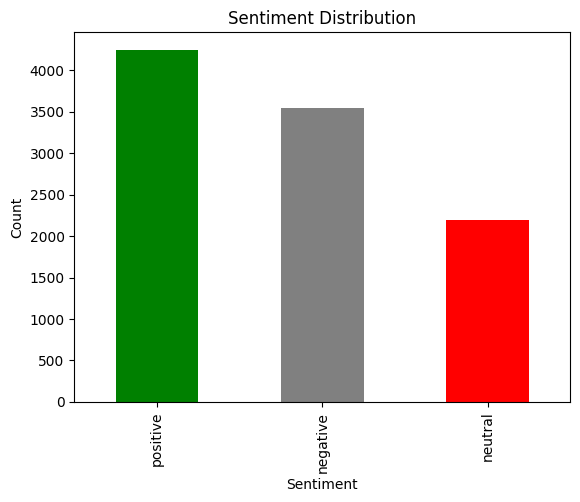

In [20]:
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [21]:
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_percentages)

sentiment
positive    42.49
negative    35.51
neutral     22.00
Name: proportion, dtype: float64


In [22]:
average_polarity = df['sentiment_polarity'].mean()
print(f'Average Sentiment Polarity: {average_polarity}')

Average Sentiment Polarity: 0.043808666666666655


In [23]:
# Sort by most positive reviews
most_positive_reviews = df.sort_values(by='sentiment_polarity', ascending=False).head()

# Sort by most negative reviews
most_negative_reviews = df.sort_values(by='sentiment_polarity', ascending=True).head()

print("Most Positive Reviews:\n", most_positive_reviews)
print("Most Negative Reviews:\n", most_negative_reviews)

Most Positive Reviews:
                                             Review_Text  Rating  \
9496  The experience was excellent. Couldn't be happ...       1   
2287  The environment felt best. Exceeded my expecta...       1   
2286    The service was best. Exceeded my expectations.       4   
3359  The staff was excellent. Exceeded my expectati...       5   
9702  The attention was top-notch. Exceeded my expec...       1   

      sentiment_polarity sentiment  
9496                 1.0  positive  
2287                 1.0  positive  
2286                 1.0  positive  
3359                 1.0  positive  
9702                 1.0  positive  
Most Negative Reviews:
                                             Review_Text  Rating  \
6085     The service had terrible. Would not recommend.       3   
9554       The provider was worst. Would not recommend.       5   
8877      The provider made worst. Would not recommend.       2   
1809      The visit felt terrible. Would not recommend.    

In [24]:
most_positive_reviews

,Review_Text,Rating,sentiment_polarity,sentiment
9496,The experience was excellent. Couldn't be happ...,1,1.0,positive
2287,The environment felt best. Exceeded my expecta...,1,1.0,positive
2286,The service was best. Exceeded my expectations.,4,1.0,positive
3359,The staff was excellent. Exceeded my expectati...,5,1.0,positive
9702,The attention was top-notch. Exceeded my expec...,1,1.0,positive


In [38]:
most_negative_reviews

,Review_Text,Rating,sentiment_polarity,sentiment
6085,The service had terrible. Would not recommend.,3,-1.0,negative
9554,The provider was worst. Would not recommend.,5,-1.0,negative
8877,The provider made worst. Would not recommend.,2,-1.0,negative
1809,The visit felt terrible. Would not recommend.,3,-1.0,negative
1068,The staff received terrible. Would not recommend.,5,-1.0,negative


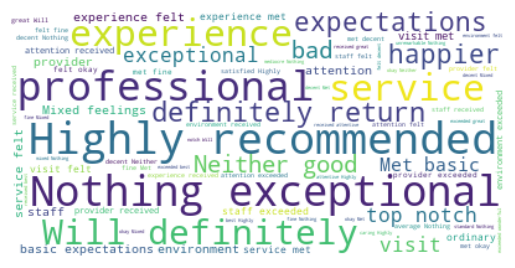

In [26]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_text = " ".join(review for review in df[df['sentiment'] == 'positive']['Review_Text'])
wordcloud = WordCloud(background_color="white").generate(positive_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

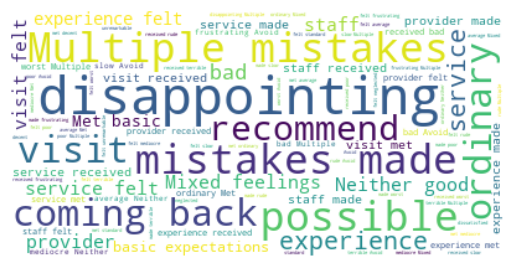

In [27]:
# Word cloud for negative reviews
negative_text = " ".join(review for review in df[df['sentiment'] == 'negative']['Review_Text'])
wordcloud = WordCloud(background_color="white").generate(negative_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

# Assuming 'sentiment' is your label (positive, negative, neutral)
X = df['Review_Text']  # Features
y = df['sentiment']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [30]:
#pipeline for sentiment classification using Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      0.94      0.97       723
     neutral       1.00      0.48      0.65       454
    positive       0.75      1.00      0.86       823

    accuracy                           0.86      2000
   macro avg       0.92      0.81      0.82      2000
weighted avg       0.90      0.86      0.85      2000



In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk

In [32]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data and transform the testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [33]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_tfidf, y_train)
# Make predictions
y_pred = model.predict(X_test_tfidf)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       723
     neutral       1.00      1.00      1.00       454
    positive       1.00      1.00      1.00       823

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [34]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
svm.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Results:\n", classification_report(y_test, y_pred_svm))

Accuracy: 1.0
SVM Results:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       723
     neutral       1.00      1.00      1.00       454
    positive       1.00      1.00      1.00       823

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Results:\n", classification_report(y_test, y_pred_rf))

Accuracy: 1.0
Random Forest Results:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       723
     neutral       1.00      1.00      1.00       454
    positive       1.00      1.00      1.00       823

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In-sights

<Axes: xlabel='sentiment'>

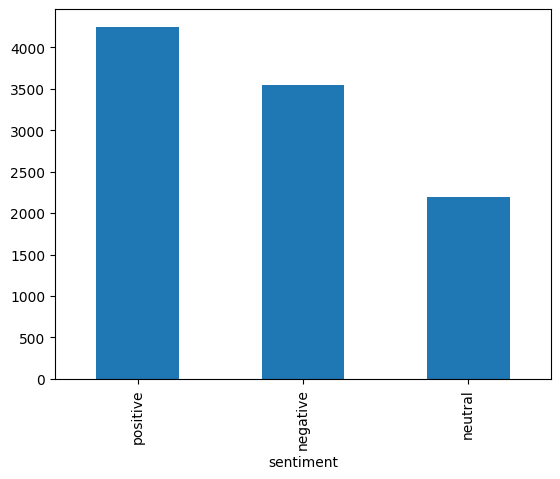

In [36]:
df['sentiment'].value_counts().plot(kind='bar')

